## Car Classification - K-Nearest-Neighbours

Task:

Write a KNN classification algorithmen for the car dataset. There are four classes for prediction.

Assume the dataset to be clean and ready for usage.

In [5]:
# Basic Python Libs
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style

              precision    recall  f1-score   support

         acc       0.79      0.82      0.81       114
        good       0.92      0.65      0.76        17
       unacc       0.94      0.96      0.95       364
       vgood       1.00      0.71      0.83        24

    accuracy                           0.91       519
   macro avg       0.91      0.78      0.84       519
weighted avg       0.91      0.91      0.91       519

[[ 93   0  21   0]
 [  5  11   1   0]
 [ 13   1 350   0]
 [  6   0   1  17]]


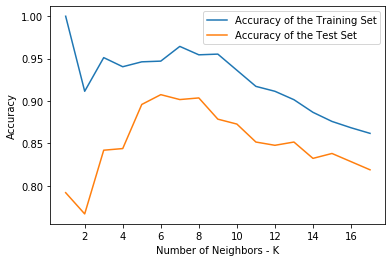

In [6]:
df = pd.read_csv('data\\car.data', delimiter=',')

feature_list = ['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class']
train_list = ['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety']
target_feature = 'class'

class_array = df[target_feature].unique()
LE = preprocessing.LabelEncoder()
feature_transformation_list = []
for feature in feature_list:
    feature_transformation_list.append(LE.fit_transform(list(df[feature])))

X = list(zip(*feature_transformation_list[0:-1]))
y = list(feature_transformation_list[-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

training_accuracy = []
test_accuracy = []
clf_list = []
neighbors_settings = range(1,18)
for K in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    clf_list.append(clf)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors - K')
plt.legend()
figname = 'KNN_K_Test.png'
plt.savefig(figname)

max_test_acc_index = test_accuracy.index(max(test_accuracy))

y_predicted = clf_list[max_test_acc_index].predict(X_test)
y_predicted_proba = clf_list[max_test_acc_index].predict_proba(X_test)
acc_KNN = clf_list[max_test_acc_index].score(X_test, y_test)
print(classification_report(y_test,
                            y_predicted,
                            target_names=LE.inverse_transform(range(len(class_array)))))
print(confusion_matrix(y_test, y_predicted))